Dataset= 
     Age        BMI  Glucose    Insulin      HOMA     Leptin  Adiponectin  \
0     52  26.543128       83   6.156439  1.352861  22.531863     8.832323   
1     41  23.527236       74   4.835092  1.013678  15.552154     6.289545   
2     40  23.278413       73   4.726075  0.985695  14.976300     6.079755   
3     27  19.535749       63   3.086309  0.564775   6.314613     2.924216   
4     32  20.839655       66   3.657587  0.711419   9.332254     4.023573   
..   ...        ...      ...        ...       ...        ...          ...   
122   45  26.850000       92   3.330000  0.755688  54.680000    12.100000   
123   62  26.840000      100   4.530000  1.117400  12.450000    21.420000   
124   65  32.050000       97   5.730000  1.370998  61.480000    22.540000   
125   72  25.590000       82   2.820000  0.570392  24.960000    33.750000   
126   86  27.180000      138  19.910000  6.777364  90.280000    14.110000   

      Resistin       MCP.1     Status  
0    10.084147  416.25776

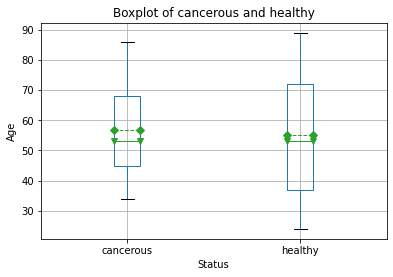

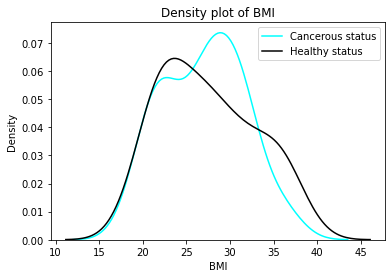

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def importData():
    #imports dataset using read function 
    df = pd.read_excel('clinical_dataset.xlsx', engine='openpyxl')
    #status list
    data = df.drop(['Status'], axis=1)
    print("Dataset= \n{0}".format(df))
    #describe Age
    print ('\n Age \n', df['Age'].describe())
    #describe BMI
    print ('\n BMI \n', df['BMI'].describe())
    #describe Glucose
    print ('\n Glucose \n', df['Glucose'].describe())
    #describe Insulin
    print ('\n Insulin \n', df['Insulin'].describe())
    #describe HOMA
    print ('\n HOMA \n', df['HOMA'].describe())
    #describe Leptin
    print ('\n Leptin \n', df['Leptin'].describe())
    #describe Adiponectin
    print ('\n Adiponectin \n', df['Adiponectin'].describe())
    #describe Resistin
    print ('\n Resistin \n', df['Resistin'].describe())
    #describe MCP.1
    print ('\n MCP.1 \n', df['MCP.1'].describe())
    #describe Status
    print ('\n Status \n', df['Status'].describe())
    return df, data
 
def preProcessingData():
    #Pass the loaded df and data
    [df, data] = importData()
    #size and features
    #Rows
    rowData = np.shape(df)[0]
    #Columns
    ColumnData = np.shape(df)[1]  
    print("\nThe size of the dataset = %d × %d\nThe number of features = %d\n"
          % (rowData, ColumnData , ColumnData))
    #finds missing values
    findMissingV(df)

    #finds categorical variables
    listCategories = list(df['Status'].value_counts().index)
    print("\nThe categorical variables =", listCategories)
    statusDummy = pd.get_dummies(df['Status'], drop_first=False, prefix='Status')
    print(statusDummy)

    #normalise before training and testing of any model
    #feature scaling
    print("\nMin Max normalization method =\n", minMaxNorm(data)) 
    
    # Plot the box and density plots
    Plots(df)
    return

def statistics(dataset, name):
    #gets std from statistics and prints it   
    stdV = ("%.2f" % np.std(dataset))  
    print("The standard deviation value of %s = %s" % (name, stdV))   
    return

def findMissingV(dataset):
    #find the location of missing vaules 
    missingValue = dataset.isnull().any()
    print("\nThe missing value status are =\n", missingValue)
    return

def minMaxNorm(dataset):
    #feature scaling
    normalData = (dataset-np.min(dataset))/(np.max(dataset)- np.min(dataset))
    return normalData

def Plots(df):
    #status and age boxplot
    df.boxplot('Age', 'Status',meanline=True, showmeans=True,
               #sets mean value point
               meanprops={'marker': 'D'},
               #Set median line
               medianprops={'marker': 'v'})
    titleBoxplot = 'Boxplot of cancerous and healthy'
    plt.title( titleBoxplot )
    plt.suptitle('') 
    plt.xlabel("Status")
    plt.ylabel('Age')
    plt.show()

    # Plot the density plot of BMI
    #healthy BMI status = healthy for BMI
    BMIhealthy = df[df['Status'] == 'healthy']['BMI']
    #cancerous status = cancerous for BMI
    BMIcancerous = df[df['Status'] == 'cancerous']['BMI'] 
    #plots healthy and cancerous
    sns.kdeplot(BMIcancerous, label="Cancerous status", color="aqua")
    sns.kdeplot(BMIhealthy, label="Healthy status", color="black")       
    plt.title('Density plot of BMI')
    plt.xlabel('BMI')
    plt.ylabel('Density')
    plt.show()
    return

def main():
    preProcessingData()
if __name__ == '__main__':
    #do current module
    main()